In [ ]:
import subprocess
from getpass import getpass

password = getpass()
cmd = ["openssl", "enc", "-d", "-aes-256-cbc", "-in", "openai-key.enc", "-pass", f"pass:{password}"]
key = subprocess.run(cmd, capture_output=True, text=True).stdout.strip("\n")

In [ ]:
from openai import OpenAI
client = OpenAI(api_key=key)

## Demo

In [ ]:
# Right image description: Three sad people wearing swimming caps standing behind a happy person with no hair. Everyone is in a swimming pool.
response = client.images.generate(
    model="dall-e-3",
    prompt='''Draw only using stick figures (black silhouettes against a white background):
    Three sad people wearing swimming caps standing behind a happy person with no hair. Everyone is in a swimming pool.
    ''',
    size="1024x1024",
    quality="standard",
    n=1,
    response_format="b64_json",
)

#print(response)

In [ ]:
import base64
with open("down.png", "wb") as f:
    f.write(base64.b64decode(response.data[0].b64_json))

## Run

In [ ]:
from typing import Tuple
from PIL import Image
import io
import base64

def png_to_img(png_bytes: bytes) -> Image.Image:
    with io.BytesIO(png_bytes) as png_buffer:
        image = Image.open(png_buffer)
        image = image.convert("RGB")
    return image

def generate(prompt: str) -> Tuple[Image.Image,str]:

    system_prompt = "Draw only using 3D black silhouettes against a white background:\n"
    final_prompt = system_prompt+prompt

    response = client.images.generate(
        model="dall-e-3",
        prompt=final_prompt,
        size="1024x1024",
        quality="standard",
        n=1,
        response_format="b64_json")

    png_bytes = base64.b64decode(response.data[0].b64_json)
    image = png_to_img(png_bytes)

    return image,response.data[0].revised_prompt

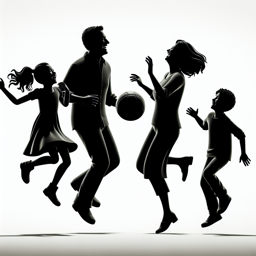

In [ ]:
display(generate("happy family")[0].resize((256,256)))